<a href="https://colab.research.google.com/github/EvilLucifer00/ML_Projects/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [ ]:
df=pd.read_csv('economic_index.csv')

In [ ]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
##drop unnecesery columns
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [ ]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [ ]:
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


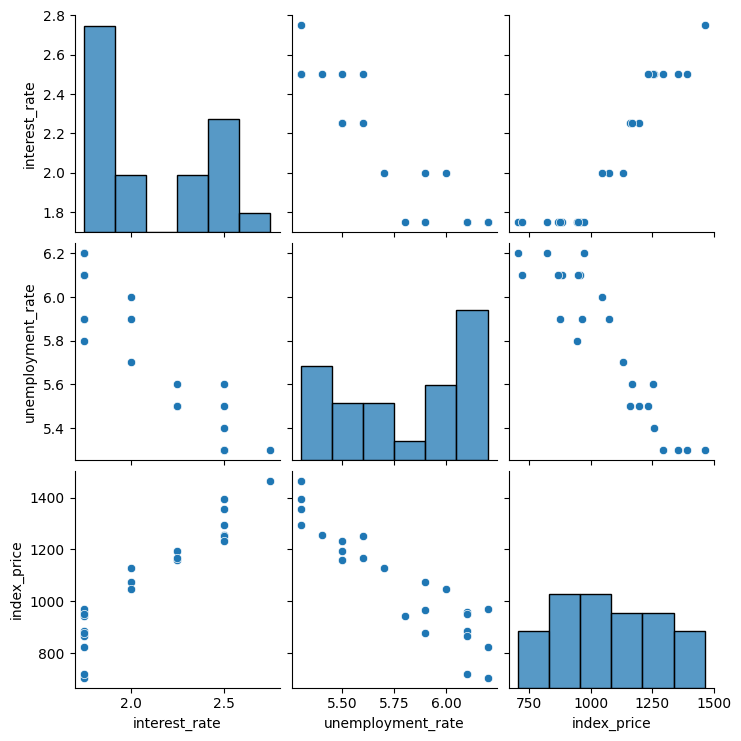

In [ ]:
##visualization
import seaborn as sns
sns.pairplot(df)

In [ ]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

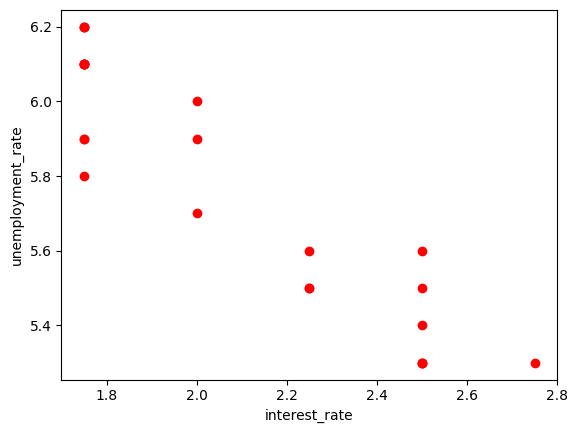

In [ ]:
 plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
 plt.xlabel('interest_rate')
 plt.ylabel('unemployment_rate')

In [ ]:
##iloc   1. : (take all the rows)  2. :-1 (except the last one)
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [ ]:
y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [ ]:
##train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
import seaborn as sns


<Axes: xlabel='interest_rate', ylabel='index_price'>

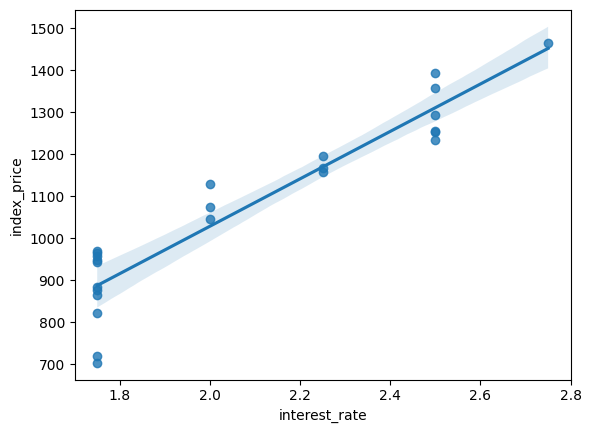

In [ ]:
sns.regplot(x='interest_rate', y='index_price', data=df)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

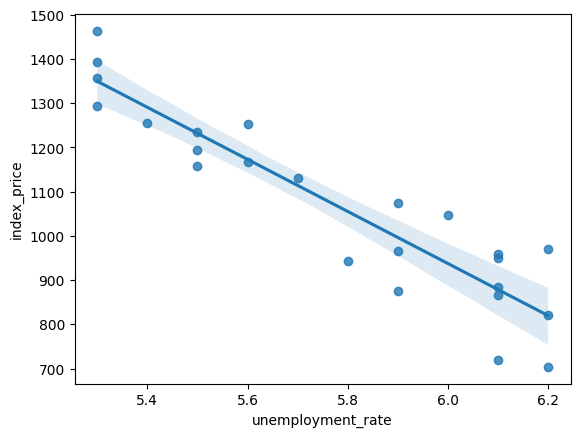

In [ ]:
sns.regplot(x='unemployment_rate', y='index_price', data=df)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

In [ ]:
X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()


In [ ]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
##cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [ ]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [ ]:
##prediction
y_pred=regression.predict(X_test)

In [ ]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [ ]:
##performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)
#display adjusted R-squared
print(1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))


0.7591371539010257
0.5985619231683761


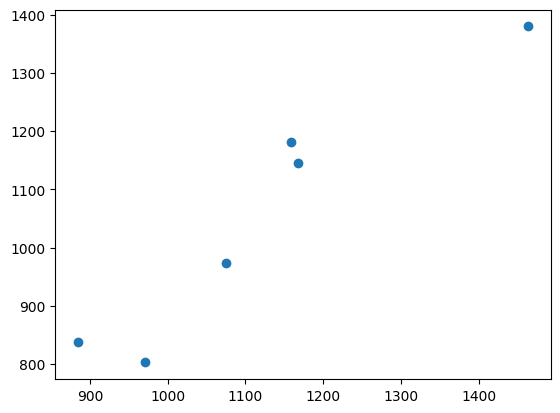

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
res=y_test-y_pred
print(res)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


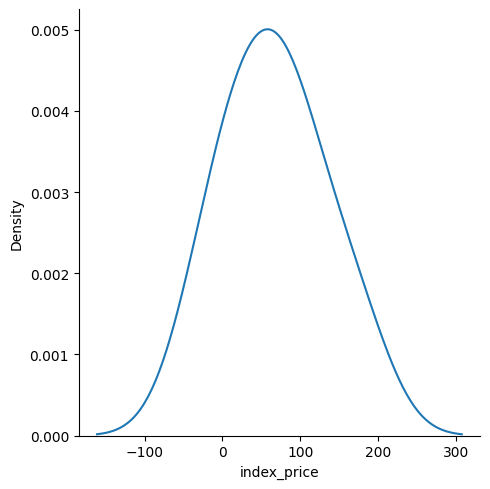

In [ ]:
##plot this residuals
sns.displot(res,kind='kde')

In [ ]:
###OLS Linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 01 Sep 2025   Prob (F-statistic):                       0.754
Time:                        06:29:46   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(regression.coef_)

[  88.27275507 -116.25716066]
